<a href="https://colab.research.google.com/github/majdsuleiman98/Sign-Language-Detection/blob/main/Sign_Language.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [51]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
import shutil
import random
from keras.applications.mobilenet import MobileNet,preprocess_input
from keras.layers import Dense,Dropout,GlobalAveragePooling2D
from keras.models import Sequential
from keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing import image
import zipfile

In [5]:
#with zipfile.ZipFile("/content/drive/MyDrive/Sign-Language-Digits-Dataset-master.zip","r") as zipobj:
#  zipobj.extractall("/content/drive/MyDrive")

In [3]:
os.chdir("/content/drive/MyDrive/Sign-Language-Digits-Dataset-master/Dataset")
Path = os.getcwd()

In [7]:
"""

if os.path.isdir("/train/0") is False:
  os.mkdir("train")
  os.mkdir("valid")
  os.mkdir("test")

  for i in range(0,10):
    shutil.move(f"{i}","train")
    os.mkdir(f"valid/{i}")
    os.mkdir(f"test/{i}")

    valid_images = random.sample(os.listdir(f"train/{i}"),25)
    for img in valid_images:
      shutil.move(f"train/{i}/{img}",f"valid/{i}")

    test_images = random.sample(os.listdir(f"train/{i}"),3)
    for img in test_images:
      shutil.move(f"train/{i}/{img}",f"test/{i}")

"""

In [4]:
def show_distribution(dataset):
  distribution=dict()
  distribution[dataset]=dict()
  for i in os.listdir(dataset):
    imgs_length = len(os.listdir(dataset+"/"+i))
    distribution[dataset][i]=imgs_length
  print(distribution)
  plt.pie(distribution[dataset].values(),labels=distribution[dataset].keys(),autopct='%1.1f%%')
  plt.show()

{'train': {'0': 177, '1': 178, '2': 178, '3': 178, '4': 179, '5': 179, '6': 179, '7': 178, '8': 180, '9': 176}}


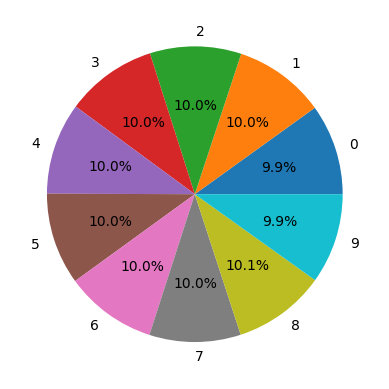

In [5]:
show_distribution("train")

{'valid': {'0': 25, '1': 25, '2': 25, '3': 25, '4': 25, '5': 25, '6': 25, '7': 25, '8': 25, '9': 25}}


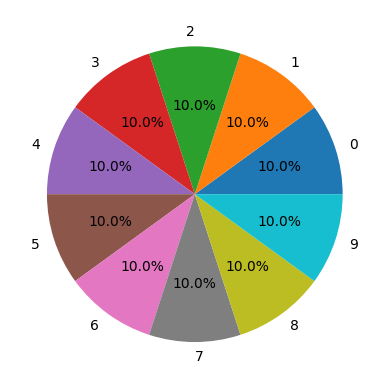

In [6]:
show_distribution("valid")

{'test': {'0': 3, '1': 3, '2': 3, '3': 3, '4': 3, '5': 3, '6': 3, '7': 3, '8': 3, '9': 3}}


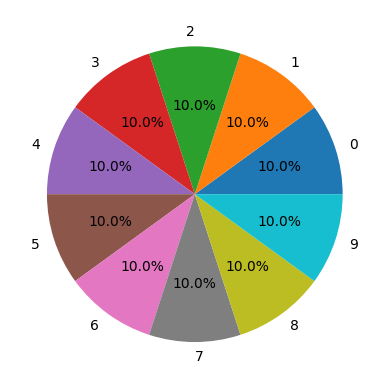

In [33]:
show_distribution("test")

In [7]:
train_datagen = ImageDataGenerator(
    preprocessing_function = preprocess_input
)

valid_datagen = ImageDataGenerator(
    preprocessing_function = preprocess_input
)

test_datagen = ImageDataGenerator(
    preprocessing_function = preprocess_input
)

In [8]:
train = train_datagen.flow_from_directory(
    "train",
    target_size=(224,224),
    batch_size=16,
)

valid = valid_datagen.flow_from_directory(
    "valid",
    target_size=(224,224),
    batch_size=16,
)

test = test_datagen.flow_from_directory(
    "test",
    target_size=(224,224),
    batch_size=16,
    shuffle=True
)

Found 1782 images belonging to 10 classes.
Found 250 images belonging to 10 classes.
Found 30 images belonging to 10 classes.


In [11]:
def draw_imgs(dataset):
  plt.figure(figsize=(10,8))
  for i in range(9):
    for x_batch,y_batch in dataset:
      plt.subplot(3,3,i+1)
      if x_batch.dtype == 'uint8':
        plt.imshow(x_batch[0] / 255.0)
      else:
        plt.imshow(x_batch[0])
      plt.title(np.argmax(y_batch[0]))
      plt.axis("off")
      break

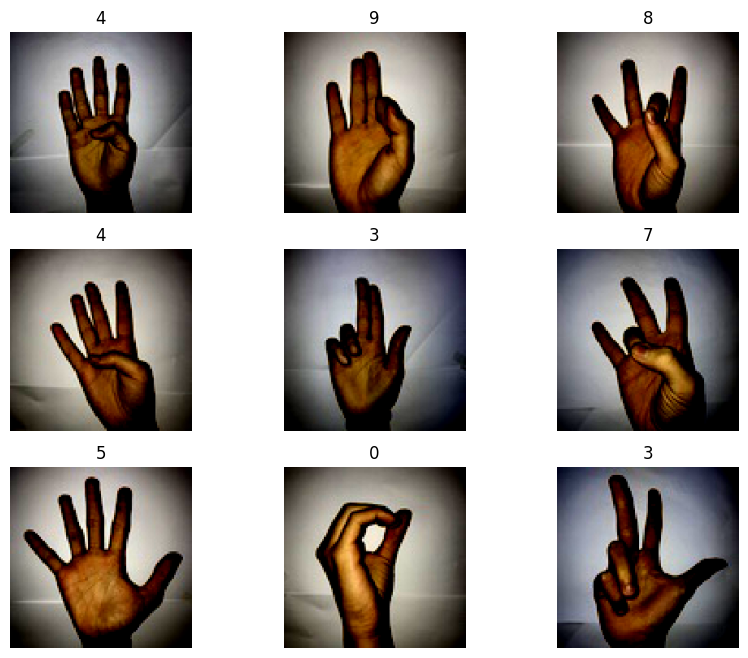

In [12]:
draw_imgs(train)

In [13]:
mobile = MobileNet(
    weights="imagenet",
    include_top=False,
)

17225924/17225924 [==============================] - 2s 0us/step


In [14]:
mobile.summary()

Model: "mobilenet_1.00_224"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, None, None, 3)]   0         
                                                                 
 conv1 (Conv2D)              (None, None, None, 32)    864       
                                                                 
 conv1_bn (BatchNormalizatio  (None, None, None, 32)   128       
 n)                                                              
                                                                 
 conv1_relu (ReLU)           (None, None, None, 32)    0         
                                                                 
 conv_dw_1 (DepthwiseConv2D)  (None, None, None, 32)   288       
                                                                 
 conv_dw_1_bn (BatchNormaliz  (None, None, None, 32)   128       
 ation)                                         

In [17]:
for layer in mobile.layers[:-23]:
  layer.trainable = False

In [25]:
model = Sequential()
model.add(mobile)
model.add(GlobalAveragePooling2D())
model.add(Dense(10,activation="softmax"))

In [26]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 mobilenet_1.00_224 (Functio  (None, None, None, 1024)  3228864  
 nal)                                                            
                                                                 
 global_average_pooling2d_1   (None, 1024)             0         
 (GlobalAveragePooling2D)                                        
                                                                 
 dense_3 (Dense)             (None, 10)                10250     
                                                                 
Total params: 3,239,114
Trainable params: 2,136,074
Non-trainable params: 1,103,040
_________________________________________________________________


In [27]:
model.compile(loss="categorical_crossentropy",optimizer="adam",metrics=["accuracy"])

In [29]:
history = model.fit(train,validation_data=valid,epochs=10)

Epoch 1/10
112/112 [==============================] - 967s 9s/step - loss: 0.1218 - accuracy: 0.9618 - val_loss: 1.0128 - val_accuracy: 0.7280
Epoch 2/10
112/112 [==============================] - 7s 66ms/step - loss: 0.0636 - accuracy: 0.9826 - val_loss: 0.0243 - val_accuracy: 0.9920
Epoch 3/10
112/112 [==============================] - 7s 63ms/step - loss: 0.0254 - accuracy: 0.9938 - val_loss: 0.0197 - val_accuracy: 0.9880
Epoch 4/10
112/112 [==============================] - 8s 72ms/step - loss: 0.0551 - accuracy: 0.9809 - val_loss: 0.1089 - val_accuracy: 0.9600
Epoch 5/10
112/112 [==============================] - 8s 69ms/step - loss: 0.0317 - accuracy: 0.9933 - val_loss: 0.6357 - val_accuracy: 0.8680
Epoch 6/10
112/112 [==============================] - 7s 65ms/step - loss: 0.0128 - accuracy: 0.9961 - val_loss: 0.0940 - val_accuracy: 0.9720
Epoch 7/10
112/112 [==============================] - 8s 72ms/step - loss: 0.0077 - accuracy: 0.9972 - val_loss: 0.0041 - val_accuracy: 1.0000

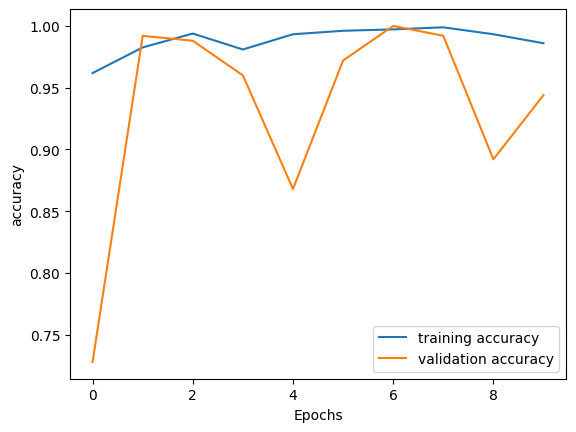

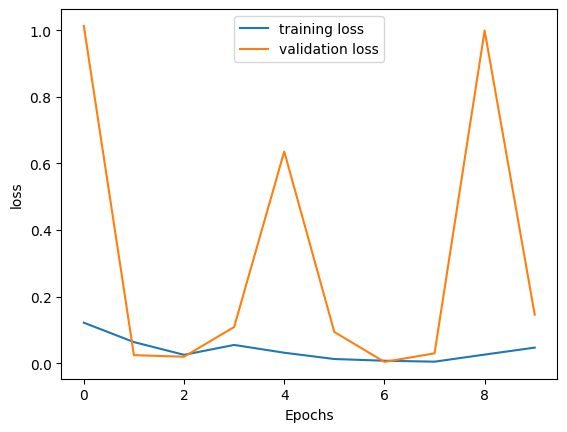

In [32]:
for i,met in enumerate(["accuracy","loss"]):
  plt.figure(i)
  plt.plot(history.history[met],label="training "+met)
  plt.plot(history.history["val_"+met],label="validation "+met)
  plt.xlabel("Epochs")
  plt.ylabel(met)
  plt.legend()
  plt.show()

In [65]:
def predict_img_class(img_path):
  img = image.load_img(img_path,target_size=(224,224))
  img = image.img_to_array(img)
  img = np.expand_dims(img,axis=0)
  img = preprocess_input(img)

  prediction = model.predict(img)
  imshow = plt.imread(img_path)
  plt.imshow(imshow)
  plt.title(np.argmax(prediction,axis=1))
  plt.axis("off")
  plt.show()

1/1 [==============================] - 0s 24ms/step


/usr/local/lib/python3.10/dist-packages/matplotlib/text.py:1279: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if s != self._text:


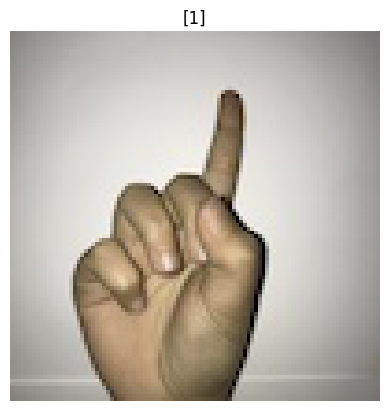

In [66]:
predict_img_class("/content/drive/MyDrive/Sign-Language-Digits-Dataset-master/Dataset/test/1/IMG_4827.JPG")

1/1 [==============================] - 0s 23ms/step


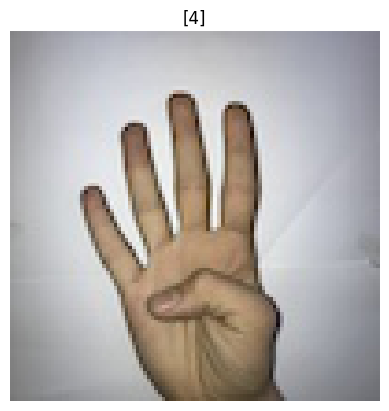

In [67]:
predict_img_class("/content/drive/MyDrive/Sign-Language-Digits-Dataset-master/Dataset/test/4/IMG_4363.JPG")